# Computational Assignment 2 - Jim Chung
## Part 1
A fluid velocity field describes how a fluid packet would move while being located in that field. The fluid packet will move following the field lines. The arrow indicates the direction in which the fluid packet moves.

A fluid velocity field is described by the following set of equations.

##### Field Equation:
u is the velocity of a fluid packet in the x direction and v is the velocity in the y direction.

\begin{align}
    u(x,y) &= \frac{- \alpha y}{(x-\beta)^2 + y^2} - \frac{\alpha y}{(x+\beta)^2 + y^2}  \\
    v(x,y) &= \frac{\alpha(x-\beta)}{(x-\beta)^2 + y^2} + \frac{\alpha(x+\beta)}{(x+\beta)^2 + y^2} 
\end{align}

We will use $\alpha = 1$ and $\beta = 0.4$

Now, I will represent the field visually by graphing it.

In [68]:
#Importing the packages required
import matplotlib.pyplot as plt #for graphing
import numpy as np #for numerical functions

In [69]:
#First, define a function that returns the velocities u and v described by the field equation.

#The inputs are alpha, beta, x, and y, where alpha and beta are constants and x and y describes the coordinate.
def velocity_func(alpha, beta, x, y):
    u = -alpha*y/((x-beta)**2 + y**2) - alpha*y/((x+beta)**2 + y**2)
    v = alpha*(x-beta)/((x-beta)**2 + y**2) + alpha*(x+beta)/((x+beta)**2+y**2)
    return u,v

Text(0, 0.5, 'y')

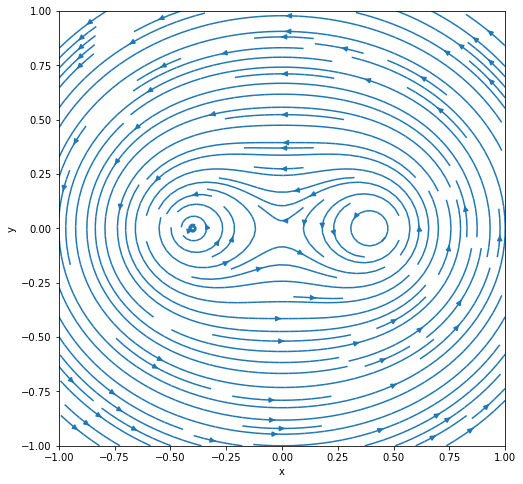

In [70]:
#Creating the velocity field using streamplot.

#defining how much of the field we want to show.
#we don't need to show what's beyond this 2 by 2 space as only the vortices are what's important.
y = np.linspace(-1,1,200) 
x = np.linspace(-1,1,200) 
X,Y = np.meshgrid(x,y)

#Inserting the velocity function
u,v = velocity_func(1,0.4,X,Y)

#Plotting
plt.figure(figsize=(8,8))
plt.streamplot(x,y,u,v,density=1.5)
plt.xlim([-1, 1])
plt.xlabel('x')
plt.ylabel('y')

We can see two vortices in the middle of the velocity field. Any fluid packet placed around that field will circulate around the two vortices.

Next, I will show that if I place a fluid packet anywhere in the field, it will follow the paths of the field lines. I will construct an algorithm to integrate the fluid trajectories forward in time, given the initial particle position. This algorithm will be based on the first example given in the example lab book provided.\

The principle of this algorithm is that we approximate the time derivative of the fluid packet position $\mathbf{x}$ as 
$$\frac{d\mathbf{x}}{dt} \approx \frac{\mathbf{x}_{t+1} - \mathbf{x}_t}{\Delta t} $$
and so
$$
\begin{align}
x_{t+1} &= x_t + \Delta t u\\
y_{t+1} &= y_t + \Delta t v
\end{align}
$$
where $\mathbf{x}_t$ is the position at time $t$, and $\mathbf{x}_{t+1}$ is the position at time $t + \Delta t$. $\Delta t$ is the timestep we can manually choose in this numerical approximation. The smaller the timestep, the more accurate the path of the fluid particle will be, but that also means there will be more calculation for the computer, which means longer processing time.

In [6]:
#Defining a function that creates a list of the positions of the particles over time.

#The input will be the initial positions, the amount of time elapsed, timestep and a label for legend purposes.
def path(xinit, yinit, time, dt, label):
    #x and y are the lists that contains the locations of the fluid packet overtime
    x=np.append([],xinit) 
    y=np.append([],yinit)
    for t in np.arange(0,time,dt): #loop at each time step
        xi = x[-1] #selects the last point of the list
        yi = y[-1]
        u,v = velocity_func(1, 0.4, xi, yi) #gives the velocity of the fluid packet at the last point
        x = np.append(x,xi+dt*u) #records the new position of the fluid after dt.
        y = np.append(y,yi+dt*v)
    plt.plot(x,y,linewidth=3,label= label) #plots the trajectory
    plt.plot(xinit,yinit,'*',label='initial') #plots the initial point
    plt.plot(x[-1],y[-1],'o',label='final') #plots the final point
    print('For',label,'final position is given by x=',"{:.2f}".format(x[-1]),'and y=',"{:.2f}".format(y[-1]))
    #"{:.2f}".format(x[-1]) limits the output to 2 decimal places

For Trajectory after 1 second final position is given by x= 0.30 and y= 0.20


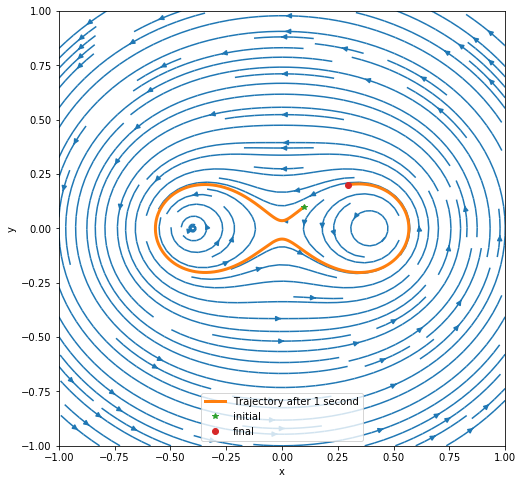

In [72]:
#Plotting the particle trajectory on top of the velocity field.
plt.figure(figsize=(8,8))
plt.streamplot(x,y,u,v,density=1.5)
#choosing a random starting point to be at 0.1,0.1. Timestep used here is 0.0001
path(0.1,0.1,1,0.0001,'Trajectory after 1 second') 
plt.ylim([-1, 1])
plt.xlim([-1, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

We can see that the particle path follows regular orbit, as expected.

## Part 2
From the previous graph, we used a timestep of 0.0001 and we saw that the fluid packet does follow the field lines. However we know that the smaller the timestep we choose the more accurate the path of the fluid packet will be. I will now plot the trajectory for a range of different dt and see the difference in trajectory.

For Trajectory with dt=0.00001 final position is given by x= 0.13 and y= 0.08
For Trajectory with dt=0.0001 final position is given by x= 0.23 and y= 0.16
For Trajectory with dt=0.001 final position is given by x= 0.18 and y= -0.18
For Trajectory with dt=0.01 final position is given by x= 0.22 and y= -0.41
For Trajectory with dt=0.1 final position is given by x= 0.07 and y= 0.89


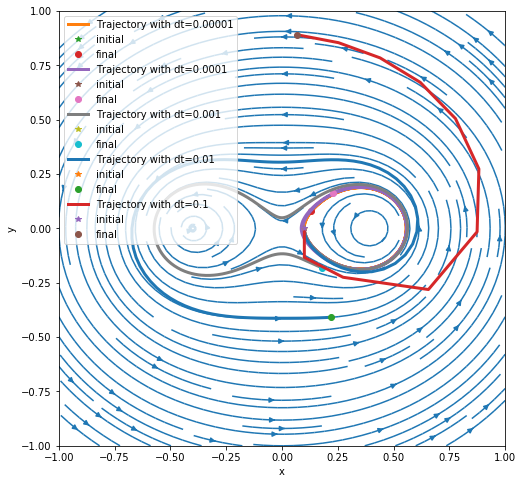

In [5]:
#Plotting the paths of the fluid packet for different timesteps after 1 second.
plt.figure(figsize=(8,8))
plt.streamplot(x,y,u,v,density=1.5)
path(0.1,0,1,0.00001,'Trajectory with dt=0.00001')
path(0.1,0,1,0.0001,'Trajectory with dt=0.0001')
path(0.1,0,1,0.001,'Trajectory with dt=0.001')
path(0.1,0,1,0.01,'Trajectory with dt=0.01')
path(0.1,0,1,0.1,'Trajectory with dt=0.1')
plt.ylim([-1, 1])
plt.xlim([-1, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

From the graph, it can be seen that the trajectory is heavily dependent on the timestep chosen. For larger timesteps the trajectory is less respondant to the velocity field, thus we see that for the trajectory with timestep 0.1 the fluid packet goes out of orbit really fast. Even for low timesteps at 0.001, the path is still different compared to the next order of magnitude as it orbits around both vortices after 1 second whereas the lower ordered timesteps only orbit around the initial vortex. The reason for that is, again, because the higher timestep trajectory is less respondant to the velocity field. In fact, because the timestep is not infitesimal, all trajectories will eventually become further and further from the centre. The smaller the timestep is the longer it takes to do so.  \

For a more quantitative description of the differences in the trajectory among the different timesteps, I will create a graph that demonstrates the change in the distance between each timestep and the lowest timestep.

In [81]:
#Start by using the same function that creates the trajectory but this time returns the final position only
def final_point(xinit, yinit, time, dt):
    x= [xinit]
    y= [yinit]
    for t in np.arange(0,time,dt):
        u,v = velocity_func(1, 0.4, x[0], y[0]) 
        #this time we are only recording the final position so we overwrites the previous position to save time
        x = [x[0]+dt*u] 
        y = [y[0]+dt*v]
    return (np.array(x+y))

In [92]:
#Now choose a range of different timesteps and record the final positions
final = []
timesteps = [1e-1,5e-2,1e-2,5e-3,1e-3,5e-4,1e-4,5e-5,1e-5,5e-6]
for timestep in timesteps:
    #choosing the same starting positions 0.1,0.01.
    #This time run it for 0.1 seconds so the trajectories don't loop around to underestimate the distance.
    displacement = final_point(0.1,0,0.1,timestep) - final_point(0.1,0,0.1,1e-6) #1e-6 being the lowest timestep
    distance = (displacement[0]**2+displacement[1]**2)**(1/2) #calculating the absolute distance
    final.append(distance)

(0.1, 5e-06)

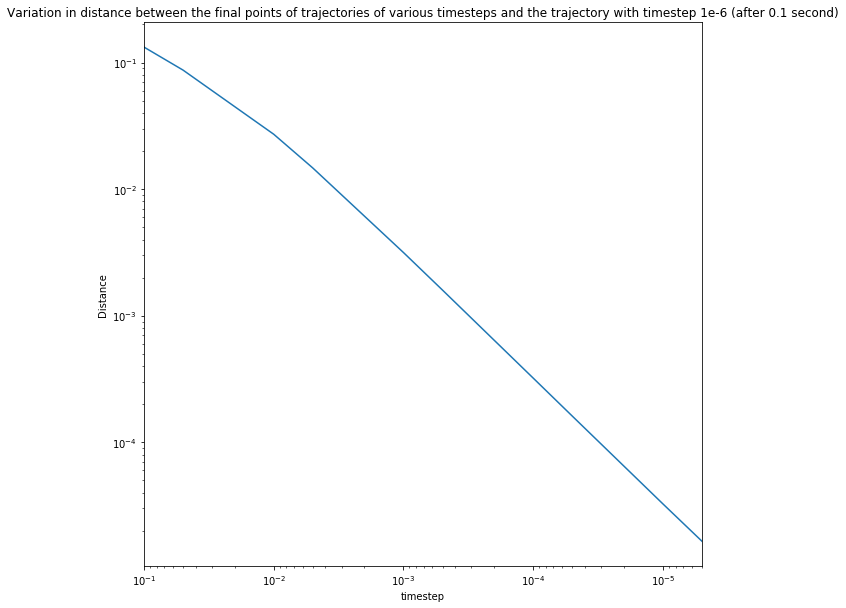

In [97]:
#Plotting the variations in distance
plt.figure(figsize=(10,10))
plt.loglog(timesteps,final)
plt.xlabel('timestep')
plt.ylabel('Distance')
plt.title('Variation in distance between the final points of trajectories of various timesteps and the trajectory with timestep 1e-6 (after 0.1 second)')
plt.xlim([timesteps[0],timesteps[-1]])

From the above graph we can see that the numerical accuracy of the system is heavily dependent on the timestep. Given a very low timestep, we can see that the error increases logarithmically as a higher timestep is chosen.

## Part 3 
Now I will apply the same problem to the blinking vortex system. The velocity field in this system is time dependent. It oscillates between two states with a period of 1 second. It is described by the equations 

\begin{align}
    u(x,y) &= \frac{- \alpha y}{(x-\beta)^2 + y^2}\\
    v(x,y) &= \frac{\alpha(x-\beta)}{(x-\beta)^2 + y^2}\\
    \beta (t) &= \beta_{0} \text{sign}(\sin{(2\pi t)})
\end{align}

where we will use the same values, $\alpha = 1$ and $\beta_0 = 0.4$. 

In [7]:
#Defining the function that returins u and v for this new system

def beta(beta0,t):
    return beta0*np.sign(np.sin(2*np.pi*t))

def blinking_vortex(alpha,beta0,x,y,t):
    u = -alpha*y/((x-beta(beta0,t))**2 + y**2) 
    v = alpha*(x-beta(beta0,t))/((x-beta(beta0,t))**2 + y**2) 
    return u,v


Text(0.5, 1.0, 'Velocity field at time = 2')

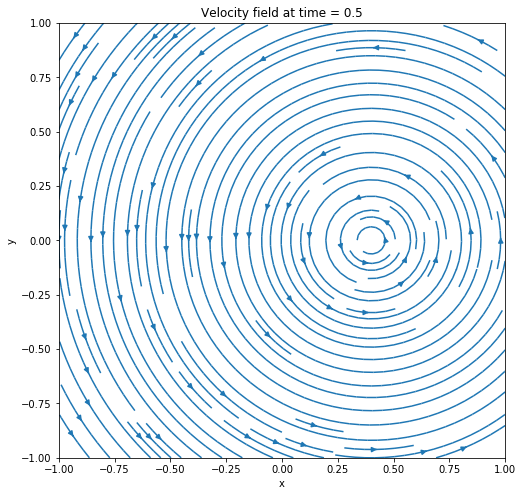

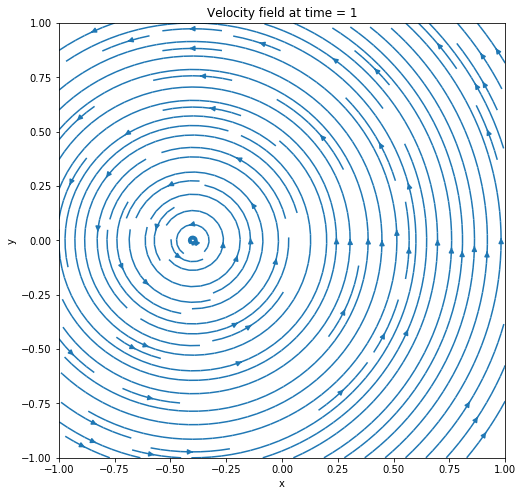

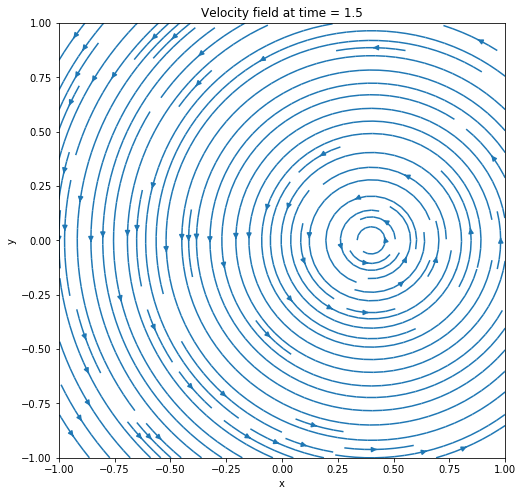

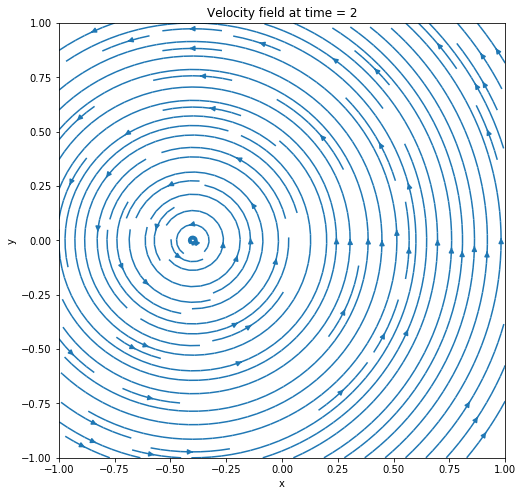

In [104]:
#Plotting this system at different times

u1,v1 = blinking_vortex(1,0.4,X,Y,0.5)
u2,v2 = blinking_vortex(1,0.4,X,Y,1)
u3,v3 = blinking_vortex(1,0.4,X,Y,1.5)
u4,v4 = blinking_vortex(1,0.4,X,Y,2)

plt.figure(figsize=(8,8))
plt.streamplot(x,y,u1,v1,density=1.5)
plt.xlim([-1, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Velocity field at time = 0.5')

plt.figure(figsize=(8,8))
plt.streamplot(x,y,u2,v2,density=1.5)
plt.xlim([-1, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Velocity field at time = 1')

plt.figure(figsize=(8,8))
plt.streamplot(x,y,u3,v3,density=1.5)
plt.xlim([-1, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Velocity field at time = 1.5')

plt.figure(figsize=(8,8))
plt.streamplot(x,y,u4,v4,density=1.5)
plt.xlim([-1, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Velocity field at time = 2')

We can see that the vortex changes position every 0.5 seconds. As a result, the system becomes chaotic, meaning that the trajectory of a fluid packet is extremely sensitive to initial conditions. We can show that this is the case by placing two particles very close to each other and let them evolve through time.

In [9]:
#Function that creates the fluid packet's trajectory, 
def chaospath(xinit,yinit,time,dt,label):
    x=np.append([],xinit)
    y=np.append([],yinit)
    for t in np.arange(0,time,dt):
        xi = x[-1]
        yi = y[-1]
        u,v = blinking_vortex(1, 0.4, xi, yi, t) 
        #exact same as the path function except using the blinking_vortex function to get the velocity
        x = np.append(x,xi+dt*u)
        y = np.append(y,yi+dt*v)
    plt.plot(x,y,linewidth=1,label= label)
    plt.plot(xinit,yinit,'*',label='initial')
    plt.plot(x[-1],y[-1],'o',label='final')

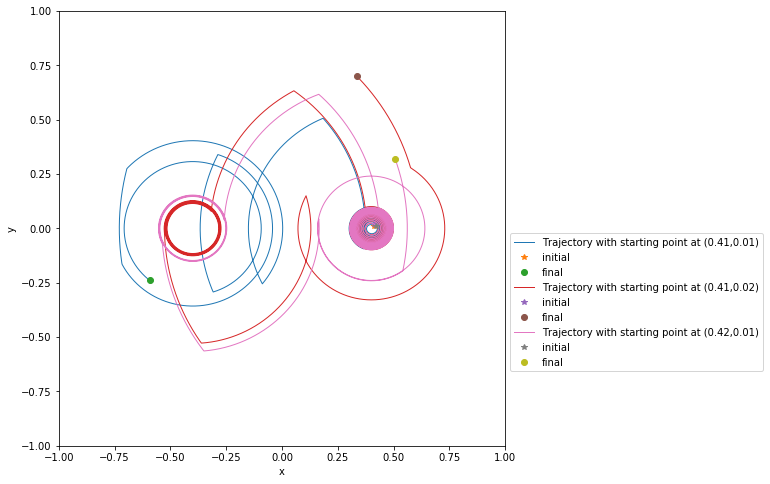

In [109]:
#Plotting the trajectory at three close starting positions: (0.42, 0.01), (0.41,0.01) and (0.41,0.02) over 4 seconds.
plt.figure(figsize=(8,8))
chaospath(0.41,0.01,4,0.0001,'Trajectory with starting point at (0.41,0.01)')
chaospath(0.41,0.02,4,0.0001,'Trajectory with starting point at (0.41,0.02)')
chaospath(0.42,0.01,4,0.0001,'Trajectory with starting point at (0.42,0.01)')
plt.ylim([-1,1])
plt.xlim([-1,1])
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best',bbox_to_anchor=(1.0,0.5))

Here we can see that the three different trajectories do follow different path. However, we cannot be sure that it is indeed a chaotic system. To analyse it quantitatively, I will calculate the Lyupanuv's exponent. 

##### Lyupanuv's exponent
In a chaotic system, the path of two particles of very close initial position tend to separate from each other exponentially with the distance between them given by $d(t)=d_0 e^{\lambda t}$, where $d_0$ is the initial distance. However this relation only holds for a certain time, because after some time the particles are too far apart from each other that they stop diverging exponentially due to the restriction of the phase space. The $\lambda$ term in the formula is known as the Lyupanuv's exponent. A system is chaotic if the Lyupanuv's exponent is greater than 0.\
After rearranging, the Lyupanuv's exponent is given by
$$\lambda = \frac{1}{\Delta t}\ln{\frac{d(t_0+\Delta t)}{d_0}}$$
where $\Delta t$ is a time segment in which the two particles separate, and d(t) is the distance between the two particles at time t. 
(note that the $\Delta t$ here is different from part 1)\
The reason we choose to use $\Delta t$ instead of an entire time length is because the exponential divergence only happens in a given time period, as described before.\
Depending on the difference in the starting position (same $d_0$ but different directions), the Lyupanov's exponent can be quite different. So after calculating the Lyupanov's exponent over many different initial positions, we obtain a Lyupanov spectrum. To calculate the Lyupanuv's exponent of the entire system, we take the average over all of the Lyupanov exponents in the spectrum. 




In [61]:
#First, we create a function that returns the end points of the path of the fluid packet similar to before.
def chaospath1(xinit,yinit,time):
    dt=0.0001
    xlist=np.append([],xinit)
    ylist=np.append([],yinit)
    for t in np.arange(0,time,dt):
        xi = xlist[-1]
        yi = ylist[-1]
        u,v = blinking_vortex(1, 0.4, xi, yi, t) 
        xlist = np.append(xlist,xi+dt*u)
        ylist = np.append(ylist,yi+dt*v)
    return [xlist[-1],ylist[-1]]

Next we will create a function that will calculate the Lyapunov's Exponent over many different initial positions (all separated by $d_0$) to obtain a Lyapunov spectrum. Then the function will take the running average of the spectrum and record them in a list. If the system is chaotic, then over time the running average will converge.\
One thing that needs to be kept in mind is that the timestep used here will have to be small enough such that the fluid packet's trajectory won't swirl outwards due to the delay in response time as discussed before. I will demonstrate this effect below.

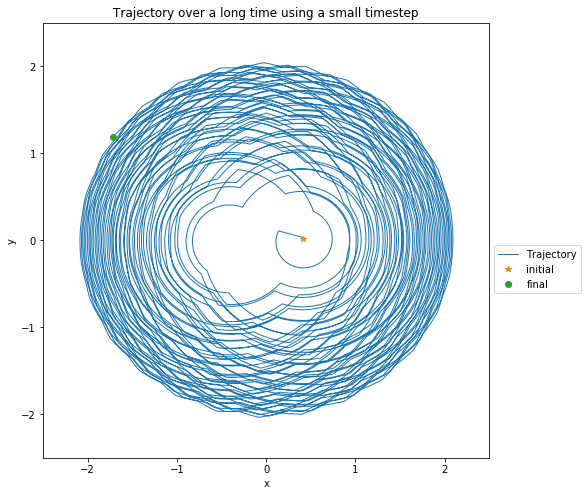

In [113]:
plt.figure(figsize=(8,8))
chaospath(0.41,0.01,800,0.01,'Trajectory')
plt.ylim([-2.5,2.5])
plt.xlim([-2.5,2.5])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectory over a long time using a small timestep')
plt.legend(loc='best',bbox_to_anchor=(1.0,0.5))

We can see that in the above figure after a long time, the trajectory gets swirled out so much that the fluid packet stop behaving chaotically.

In [114]:
#Now let's create the function to calculate the Lyapunov's exponent
#The input will be the initial position of one of the paths, the initial separation, time segment and total time.
def Lyapunov_Exponent(x0,y0,d0,deltat,final_time):
#Defining the initial position of the second fluid packet respect to the initial position of the first fluid packet.
    xx0 = x0
    yy0 = y0+d0
    
    #a list that contains every calculation of Lyapunov's exponent for every deltat
    Lyapunov_list = []
    
    #first stop
    x1,y1 = chaospath1(x0,y0,deltat) #position of the first fluid packet after deltat
    xx1,yy1 = chaospath1(xx0,yy0,deltat) #position of the second fluid packet after deltat

    #loop the list for every deltat
    
    for t in np.arange(0,final_time,deltat):
        
    #now calculating the separation between the two fluid packets
        displacement = np.array([xx1,yy1])-np.array([x1,y1]) #Vector from x1,y1 to xx1,yy1
        distance = (displacement[0]**2+displacement[1]**2)**(1/2) #Absolute distance between those two points
        
    #Calculating a Lyapunov element in the Lyapunov's spectrum and putting it into the list
        Lyapunov = np.log(distance/d0)/deltat 
        Lyapunov_list = np.append(Lyapunov_list,Lyapunov) 
        
    #Resetting the initial positions again. 
    #The initial position of the first path will now be the end point of the first fluid packet
    #The initial position of the second path will be the end point of the first fluid packet plus d0 in the direction
    #of the end point of the second fluid packet.
        displacement_normalised = displacement/(distance/d0) #Normalised Displacement
        xxn1,yyn1 = np.array([x1,y1])+displacement_normalised #New starting position of the second path
    #Updating the end points for the loop
        x1,y1 = chaospath1(x1,y1,deltat)
        xx1,yy1 = chaospath1(xxn1,yyn1,deltat)

    #average of all the Lyapunov's exponent
    Lyapunov_running = [np.mean(Lyapunov_list[:i]) for i in range(1,len(Lyapunov_list))]
    
    #Plotting
    plt.plot(Lyapunov_running)

Now we will plot the running average of the Lyapunov's exponent and check for convergence. I will choose a time segment of 4 as that is 4 times the period of the blinking chaotic system, allowing chaotic dynamics to settle in. I will choose the final time to be 400, creating 100 elements in the Lyapunov's spectrum. The time step used here is 0.0001, which is not too large so that the fluid packet will swirl out of chaos due to response delay and not too small so that my computer could run it within 10 minutes.

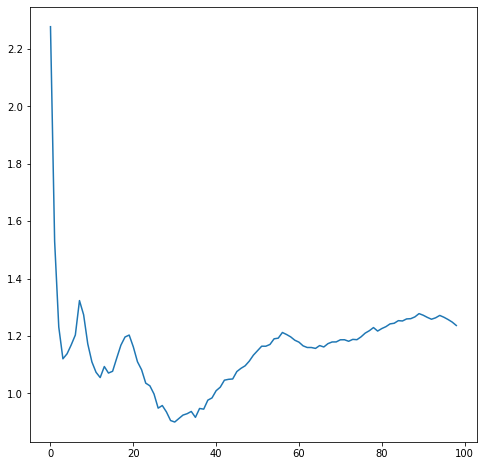

In [65]:
plt.figure(figsize=(8,8))
Lyapunov_Exponent(0.4,0,0.0001,4,400) 
#Chose 0.4,0 which is near the centre of the vortex so the fluid packet doesn't swirl out as quick.

We see that the Lyapunov's exponent kind of converges at around 1.2 over time. Due to the limit in computational power, I could not use smaller timesteps for better accuracy or longer overall time to demonstrate a better convergence. Since 1.2 is well above 0 and the running average has never fallen below 0.8, it can be concluded that the Lyapunov's exponent is positive and thus the system is chaotic.